In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# GLOBAL Variables
ROOT = "../../DATA/"
PROVIDER = "PAQI"
ROOT_RESULT = "../../RESULT/"


def print_col(c):
    for n_i in range(len(c)):
        print(n_i, "]", c[n_i])


def tag2label(tag : str):
    tag = tag.upper()
    tag = tag.replace("_5", ".5")
    tag = tag.replace("_", " ")
    return tag


print("Definitions ended")


Definitions ended


In [12]:
print("Reading data . . .")
data = pd.read_csv(ROOT + PROVIDER + "-clean.csv")
cities_list = data["city"].unique()

print("[Data columns]")
print_col(list(data.columns))



Reading data . . .
[Data columns]
0 ] Unnamed: 0
1 ] serial_number
2 ] city
3 ] name
4 ] longitude
5 ] latitude
6 ] online_since
7 ] datetime
8 ] pm2_5
9 ] us_aqi
10 ] co2
11 ] temperature
12 ] relative_humidity
13 ] outdoor_pm2_5
14 ] outdoor_us_aqi


In [19]:
# Data to PLOT
X_DATA = "temperature"
Y_DATA = "us_aqi"
X_LABEL = tag2label(X_DATA)
Y_LABEL = tag2label(Y_DATA)
TITLE = "( " + X_LABEL + " | " + Y_LABEL + " )"
VER = "-0"
RESULT_FOLDER = ROOT_RESULT + TITLE + VER + "/"
plt_data = data[data[X_DATA].isnull() == False]
plt_data = data[data[Y_DATA].isnull() == False]

dx = data[X_DATA]
dy = data[Y_DATA]
x_LIM = min(dx), max(dx)
Y_LIM = min(dy), max(dy)

# Figure Settings

Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/PAKISTAN.png
Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/city_wise/Lahore.png
Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/city_wise/Bahawalpur.png
Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/city_wise/Rawalpindi.png
Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/city_wise/Faisalabad.png
Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/city_wise/Gujranwala.png
Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/city_wise/Karachi.png
Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/city_wise/Islamabad.png
Saving Fig to: ../../RESULT/( TEMPERATURE | US AQI )-0/city_wise/Peshawar.png


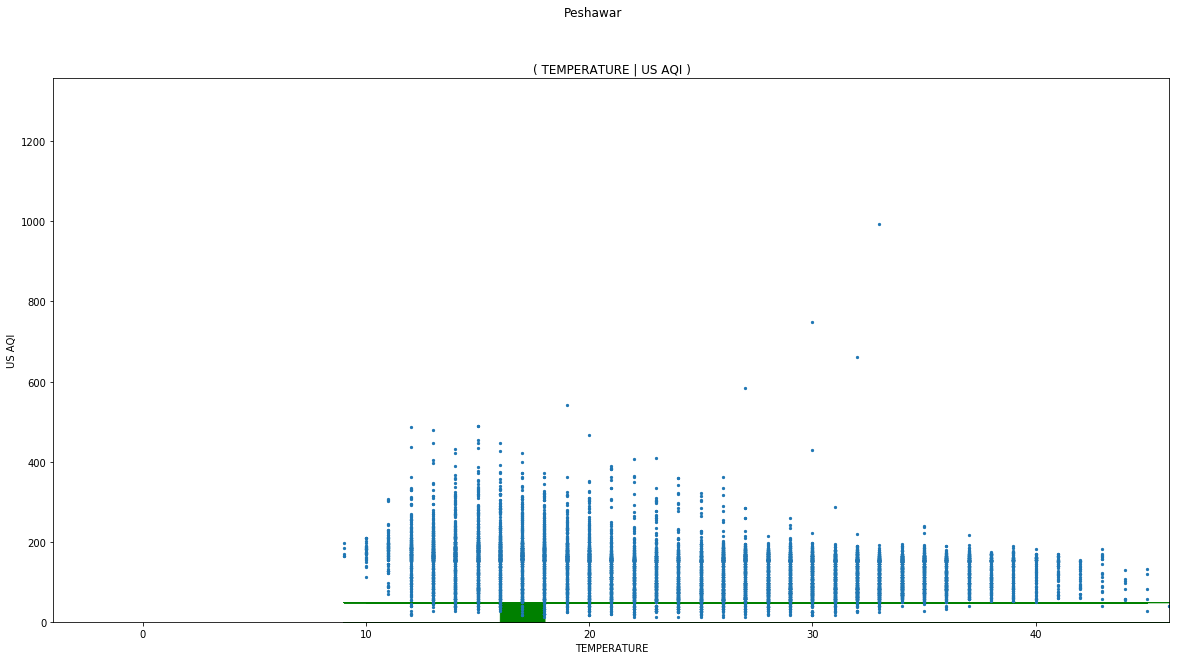

In [21]:
plt.figure(figsize=(20, 10))    # Set size
def draw_plot(x, y, path, file_name):
    plt.clf()
    # -Set Titles
    plt.title(TITLE)
    plt.suptitle(file_name)
    # -Set limits
    plt.xlim(*x_LIM)
    plt.ylim(*Y_LIM)
    # -Set Axis Labels
    plt.xlabel(X_LABEL)
    plt.ylabel(Y_LABEL)
    plt.stackplot(x, [50] * len(x), color="g")
    plt.scatter(x, y, s=5)
    
    os.makedirs(path, exist_ok=True)
    
    path = path + file_name + ".png"
    print("Saving Fig to:", path)
    plt.savefig(path)

draw_plot(dx, dy, RESULT_FOLDER, "PAKISTAN")
for city in cities_list:
    city_data = data[data.city == city]
    draw_plot(city_data[X_DATA],
              city_data[Y_DATA],
              RESULT_FOLDER + "city_wise/", city)

In [15]:
data.head(2)["datetime"]

165    1/18/18 12:00
166    1/18/18 13:00
Name: datetime, dtype: object